# Plotting velocity evolution and comparison to the LL SNe sample

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
path = os.getcwd()+'/'
spec_path = path+'spec/'

veldf = pd.read_csv(spec_path+'2021gmj_vels.csv')
veldf

,phase,line,velocity,err
0,1.1,halpha,-11103.359096,1692.475592
1,1.3,halpha,-11722.313885,126.330895
2,2.4,halpha,-10720.999930,317.696414
3,6.7,halpha,-8140.877266,1709.762073
4,8.4,halpha,-8596.016927,46.423917
5,13.5,halpha,-8252.350180,288.438877
6,1.3,hbeta,-9406.559619,868.605968
7,2.4,hbeta,-10651.916215,1248.539136
8,8.4,hbeta,-8833.680547,1061.673378
9,13.5,hbeta,-8239.339352,1837.279663


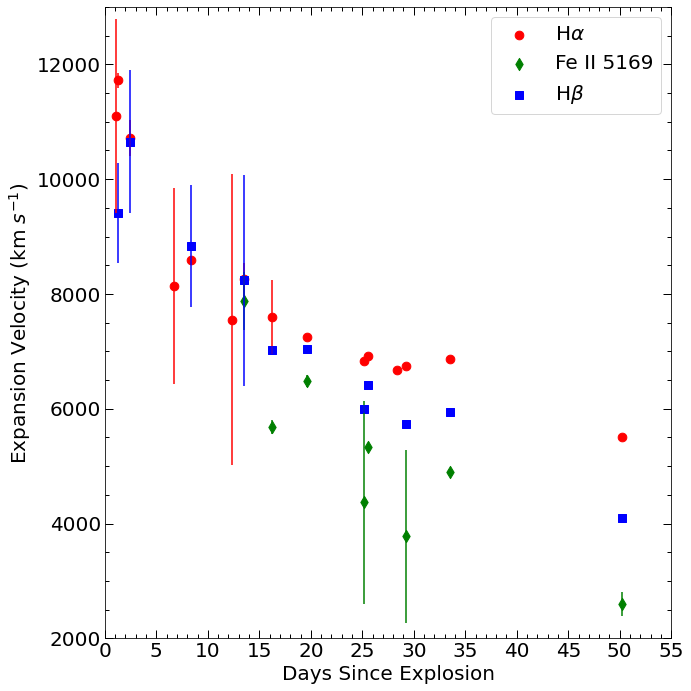

In [4]:
labels = {'halpha': r'H$\alpha$', 'hbeta': r'H$\beta$', 'fe5169': r'Fe II 5169'}
colors = {'halpha':'red', 'hbeta': 'blue', 'fe5169': 'green'}
markers = {'halpha': 'o', 'hbeta': 's', 'fe5169': 'd'}
size = 75

plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size': 20})
for i in range(len(set(veldf['line']))):
    line = list(set(veldf['line']))[i]
    tdf = veldf[(veldf['line']==line)]
    plt.scatter(tdf['phase'],abs(tdf['velocity']),
                s=size,marker=markers[line],color=colors[line],label=labels[line])
    plt.errorbar(tdf['phase'],abs(tdf['velocity']),yerr=tdf['err'],color=colors[line],fmt='',linestyle='')

plt.gca().tick_params(direction='in', length=8, width=1, which='major')
plt.gca().tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
plt.gca().set_yticks(np.arange(0,20000,2000))
plt.gca().set_yticks(np.arange(0,20000,500), minor=True)
plt.gca().yaxis.set_ticks_position('both')
# x ticks
plt.gca().set_xticks(np.arange(-5,100,5))
plt.gca().set_xticks(np.arange(-5,100,1), minor=True)
plt.gca().xaxis.set_ticks_position('both')

plt.xlim([0.,55.])
plt.ylim([2000,13000])
plt.xlabel('Days Since Explosion')
plt.ylabel(r'Expansion Velocity (km $s^{-1}$)')
plt.legend()
plt.tight_layout()
plt.savefig(path+'figures/velocity_evo.png',format='png',dpi=300)
plt.show()

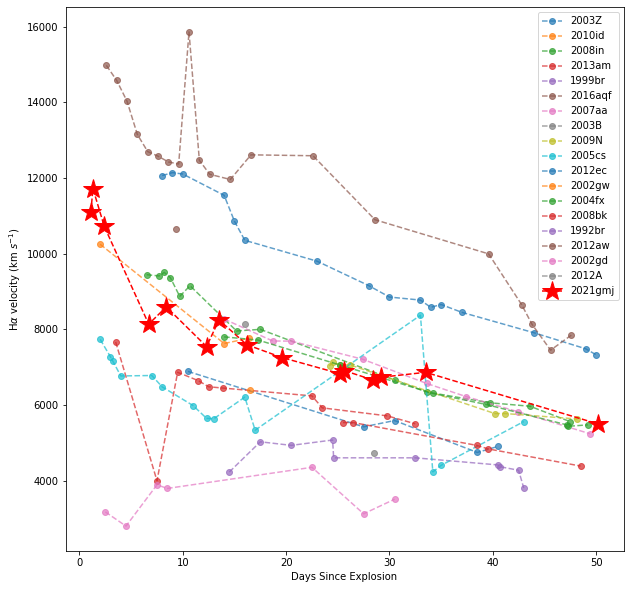

In [11]:
lldf = pd.read_csv(path+'LLSNe/LLSNe_velocity.csv')
llconst = pd.read_csv(path+'LLSNe/LL_expds_hand.csv')
restWaves = {'halpha': 6563, 'fe5169': 5169, 'hbeta': 4861}
c = 2.998e5 # km/s

plt.figure(figsize=(10,10))
for sn in list(set(lldf['sn'])):
    tdf = lldf[(lldf['sn']==sn)&(lldf['line']=='halpha')]
    
    vels = []
    z = llconst[(llconst['name']==sn)]['z']
    for ind,row in tdf.iterrows():
        vels.append(abs(float(row['wavelength'])-restWaves[row['line']])/
                    (float(row['wavelength'])) * c)
    
    plt.plot(tdf['phase'],vels,label=sn,linestyle='--',marker='o',alpha=0.7)
    
# 21gmj
hadf = veldf[(veldf['line']=='halpha')].sort_values('phase')
# need to sort these values before plotting
plt.plot(hadf['phase'],abs(hadf['velocity']),color='red',linestyle='--',marker='*',markersize=20,label='2021gmj')

plt.xlabel('Days Since Explosion')
plt.ylabel(r'H$\alpha$ velocity (km $s^{-1}$)')
plt.legend()

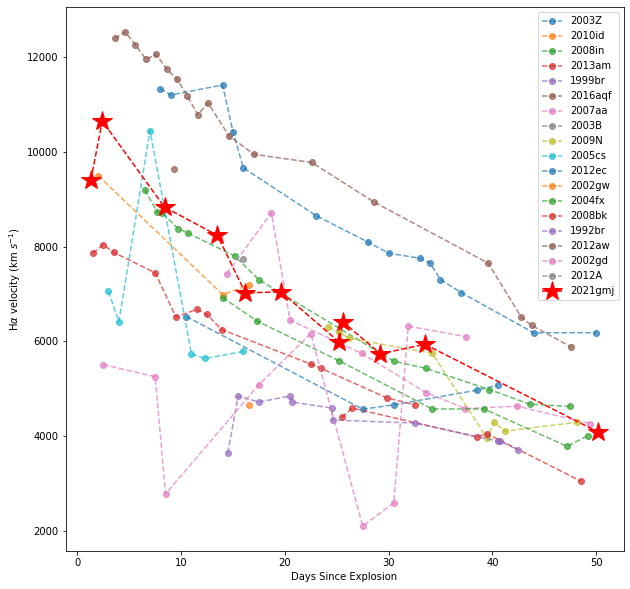

In [13]:
plt.figure(figsize=(10,10))
for sn in list(set(lldf['sn'])):
    tdf = lldf[(lldf['sn']==sn)&(lldf['line']=='hbeta')]
    
    vels = []
    z = llconst[(llconst['name']==sn)]['z']
    for ind,row in tdf.iterrows():
        vels.append(abs(float(row['wavelength'])-restWaves[row['line']])/
                    (float(row['wavelength'])) * c)
    
    plt.plot(tdf['phase'],vels,label=sn,linestyle='--',marker='o',alpha=0.7)
    
# 21gmj
hadf = veldf[(veldf['line']=='hbeta')].sort_values('phase')
# need to sort these values before plotting
plt.plot(hadf['phase'],abs(hadf['velocity']),color='red',linestyle='--',marker='*',markersize=20,label='2021gmj')

plt.xlabel('Days Since Explosion')
plt.ylabel(r'H$\alpha$ velocity (km $s^{-1}$)')
plt.legend()